<a href="https://colab.research.google.com/github/michaelholm6/ME592Hwk1/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow as imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp

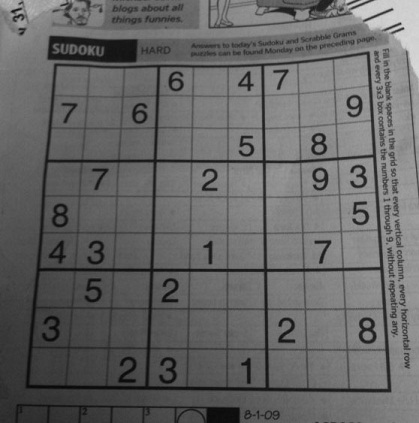

In [ ]:
sudoku = cv2.imread('sudoku-original.png')
graySudoku = cv2.cvtColor(sudoku, cv2.COLOR_BGR2GRAY)
imshow(graySudoku)

<function matplotlib.pyplot.show>

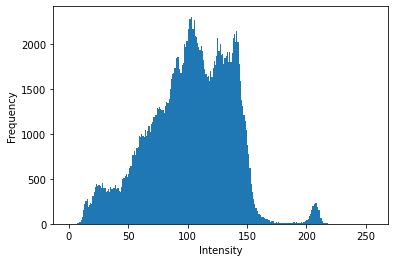

In [ ]:
plt.xlabel("Intensity")
plt.ylabel("Frequency")
plt.hist(graySudoku.ravel(), 256, (0, 256))
plt.show

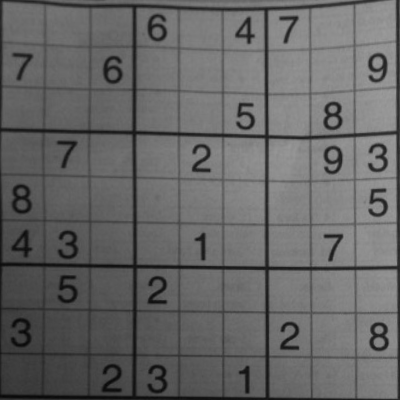

In [ ]:
points1 = np.float32([[55, 65], [370, 55],
                       [390, 390], [28, 390]])
points2 = np.float32([[0, 0], [400, 0],
                       [400, 400], [0, 400]])
matrix = cv2.getPerspectiveTransform(points1, points2)
result = cv2.warpPerspective(graySudoku, matrix, (400, 400))
imshow(result)

In [ ]:
data=pd.read_csv('energydata_complete.csv', sep=',',header=None)
data.values

array([['date', 'Appliances', 'lights', ..., 'Visibility', 'Tdewpoint',
        'Energy Consumption'],
       ['1/11/2016 17:00', '60', '30', ..., '63', '5.30E+00',
        '13.27543316'],
       ['1/11/2016 17:10', '60', '30', ..., '59.16666667', '5.20E+00',
        '18.60619498'],
       ...,
       ['3/19/2016 19:00', '140', '10', ..., '24', '1.20E+00',
        '31.23810607'],
       ['3/19/2016 19:10', '120', '10', ..., '23.33333333', '1.28E+00',
        '4.537268553'],
       ['3/19/2016 19:20', '90', '0', ..., nan, nan, nan]], dtype=object)

In [ ]:
data = data.to_numpy()

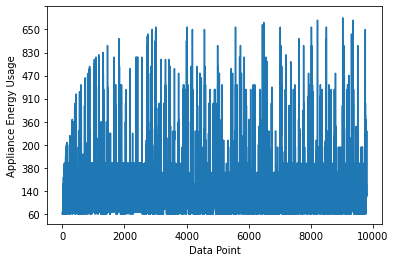

In [ ]:
y = data[1:, 1]
plt.xlabel("Data Point")
plt.ylabel("Appliance Energy Usage")
plt.plot(y)
plt.yticks(np.arange(0, 100, 10))
plt.show()

<function matplotlib.pyplot.show>

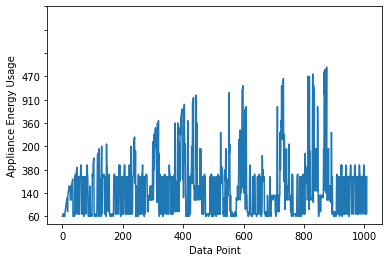

In [ ]:
y = data[1:1010, 1]
plt.xlabel("Data Point")
plt.ylabel("Appliance Energy Usage")
plt.plot(y)
plt.yticks(np.arange(0, 100, 10))
plt.show

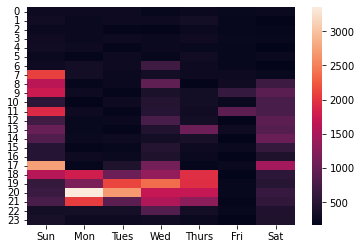

In [ ]:
dataSet = pd.read_csv('energydata_complete.csv', usecols = [0,1])
dataSet2 = dataSet
dataSet.head()
dataSet = dataSet.to_numpy()
dataSet = dataSet[762:1770, 1]
dataSet = np.reshape(dataSet, [-1, 6])
dataSet1 = dataSet
dataSet = np.sum(dataSet, 1)
dataSet = np.reshape(dataSet, [24,7], order='F')
dataSet = dataSet.astype(int)
sns.heatmap(dataSet, xticklabels=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat'], yticklabels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

(array([7.958e+03, 8.560e+02, 4.420e+02, 3.160e+02, 1.090e+02, 7.000e+01,
        4.000e+01, 1.200e+01, 2.000e+00, 2.000e+00]),
 array([10.0, 117.0, 224.0, 331.0, 438.0, 545.0, 652.0, 759.0, 866.0,
        973.0, 1080.0], dtype=object),
 <a list of 10 Patch objects>)

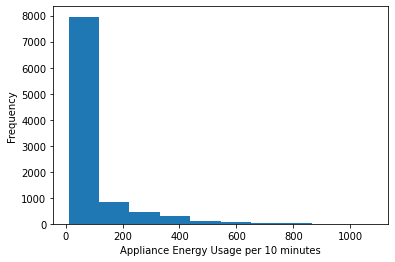

In [ ]:
data1 = dataSet2.to_numpy()
data1 = data1[:,1]
plt.xlabel("Appliance Energy Usage per 10 minutes")
plt.ylabel("Frequency")
plt.hist(data1)

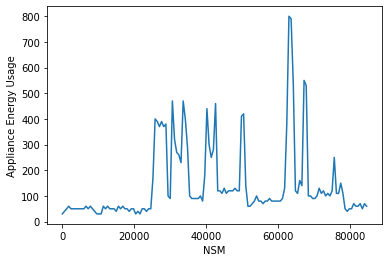

In [ ]:
dataSet1 = dataSet1.reshape(-1, 1)
y = []
for i in range(142):
  y.append(i*600)
plt.xlabel("NSM")
plt.ylabel("Appliance Energy Usage")
plt.plot(y, dataSet1[0:142, 0])

[60 733.5]


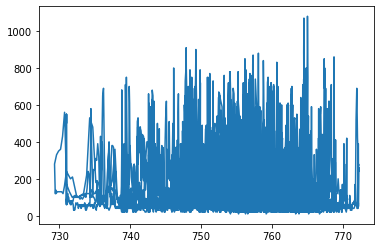

In [ ]:
data2 = data[:, [1,2]]
plt.plot(data2[:,1], data2[:,0])

In [ ]:
"""
Energy use is a function of NSM and Pressure because more people will be using heaters, microwaves, TVs, etc. during the day, so as NSM approaches the
8Pm mark, energy usage increases. Barely anyone is going to be using applicances at 1AM. Also, energy usage is a function of pressure because pressure increases throughout
the day, as the sun warms the planet. This follows the same reasoning as the NSM reasoning. Additionally, in general, atmoshperic pressure can affect running of things
like AC and heater, meaning that changes in this value will change heaters and ACs running, which will change energy usage.
"""

In [ ]:
dataAirfoil = np.loadtxt('airfoil_self_noise.dat', unpack = True)
df_describe = pd.DataFrame(dataAirfoil[5, :])
print(df_describe.describe())
print('median ' + str(np.median(dataAirfoil[5,:])))
print('kurtosis ' + str(sp.stats.kurtosis(dataAirfoil[5, :])))
print('skewness ' + str(sp.stats.skew(dataAirfoil[5, :])))
range = np.amax(dataAirfoil[5, :]) - np.amin(dataAirfoil[5, :])
print('range ' + str(range))

                 0
count  1503.000000
mean    124.835943
std       6.898657
min     103.380000
25%     120.191000
50%     125.721000
75%     129.995500
max     140.987000
median 125.721
kurtosis -0.31713243440698324
skewness -0.4185339558133514
range 37.607
